Original Notebook used to increase my knowledge: https://www.kaggle.com/code/azmary/healthcare-trends-data-analysis/notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./healthcare_dataset.csv')

In [3]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
df.shape

(55500, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [7]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [9]:
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date
count,55500.000000,55500,55500.000000,55500.000000,55500
mean,51.539459,2021-11-01 01:02:22.443243008,25539.316097,301.134829,2021-11-16 13:15:20.821621504
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00
25%,35.000000,2020-07-28 00:00:00,13241.224652,202.000000,2020-08-12 00:00:00
50%,52.000000,2021-11-01 00:00:00,25538.069376,302.000000,2021-11-17 00:00:00
75%,68.000000,2023-02-03 00:00:00,37820.508436,401.000000,2023-02-18 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00
std,19.602454,NaN,14211.454431,115.243069,NaN


In [10]:
df.describe(include = "object").T

,count,unique,top,freq
Name,55500,49992,DAvId muNoZ,3
Gender,55500,2,Male,27774
Blood Type,55500,8,A-,6969
Medical Condition,55500,6,Arthritis,9308
Doctor,55500,40341,Michael Smith,27
Hospital,55500,39876,LLC Smith,44
Insurance Provider,55500,5,Cigna,11249
Admission Type,55500,3,Elective,18655
Medication,55500,5,Lipitor,11140
Test Results,55500,3,Abnormal,18627


In [11]:
df['Gender'].value_counts()

Gender
Male      27774
Female    27726
Name: count, dtype: int64

In [12]:
df['Blood Type'].value_counts()

Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64

In [13]:
df['Admission Type'].value_counts()

Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64

In [14]:
df['Test Results'].value_counts()

Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64

In [15]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

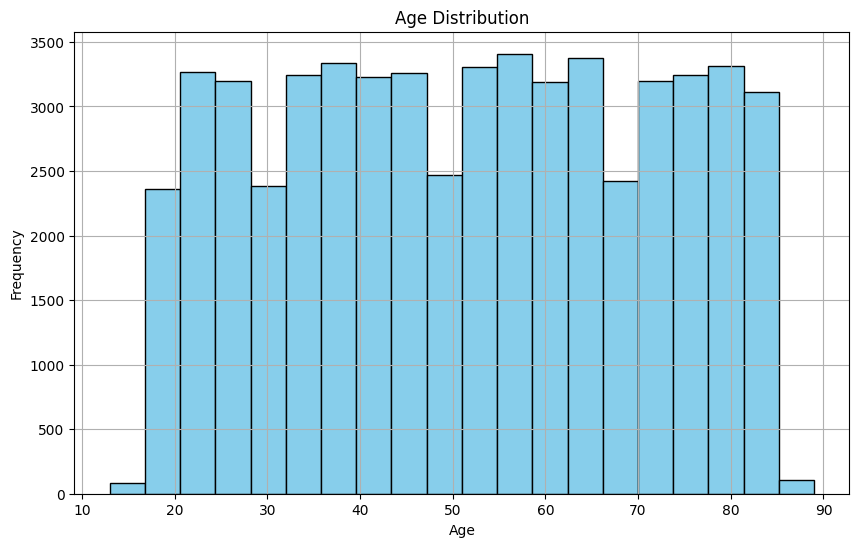

In [16]:
plt.figure(figsize=(10,6))
plt.hist(df['Age'], bins = 20, color = 'skyblue', edgecolor = 'black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

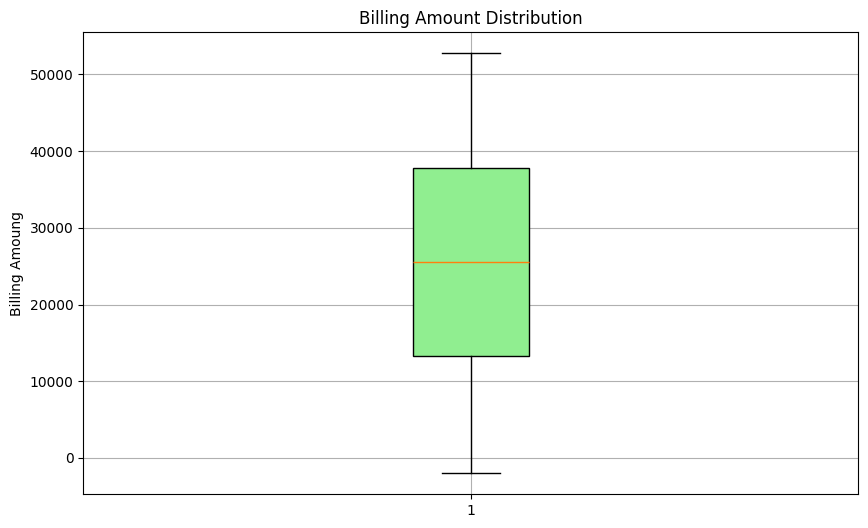

In [17]:
plt.figure(figsize=(10,6))
plt.boxplot(df['Billing Amount'], patch_artist = True, boxprops = dict(facecolor = 'lightgreen', color = 'black'))
plt.title('Billing Amount Distribution')
plt.ylabel('Billing Amoung')
plt.grid(True)
plt.show()

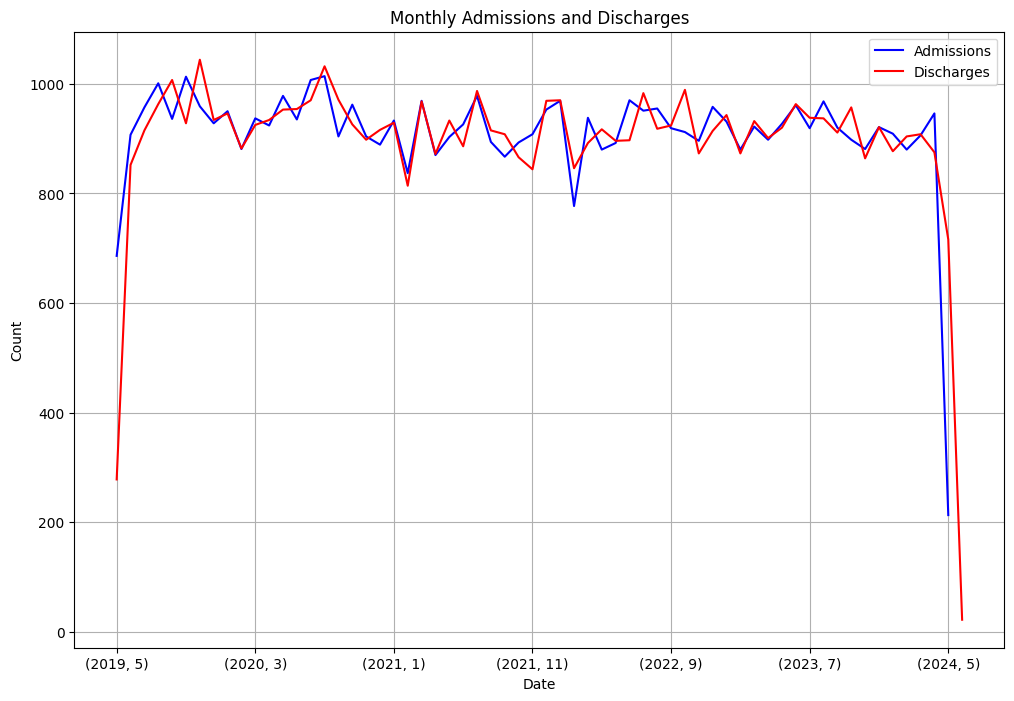

In [18]:
admission_counts = df.groupby([df['Date of Admission'].dt.year, df['Date of Admission'].dt.month]).size()
discharge_counts = df.groupby([df['Discharge Date'].dt.year, df['Discharge Date'].dt.month]).size()

data = pd.DataFrame({'Admissions': admission_counts, 'Discharges': discharge_counts})


data.plot(linestyle='-', figsize=(12, 8), color = ['blue', 'red'])  # Adjust figure size as needed

plt.title('Monthly Admissions and Discharges')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

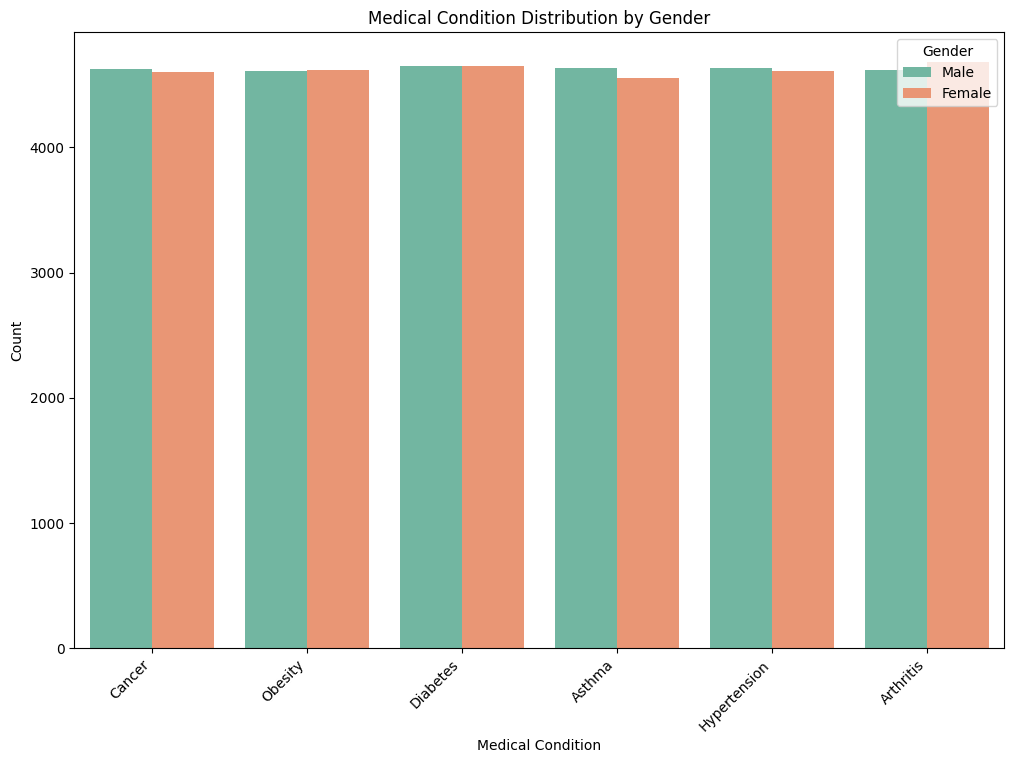

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Medical Condition', hue='Gender', palette='Set2')
plt.title('Medical Condition Distribution by Gender')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

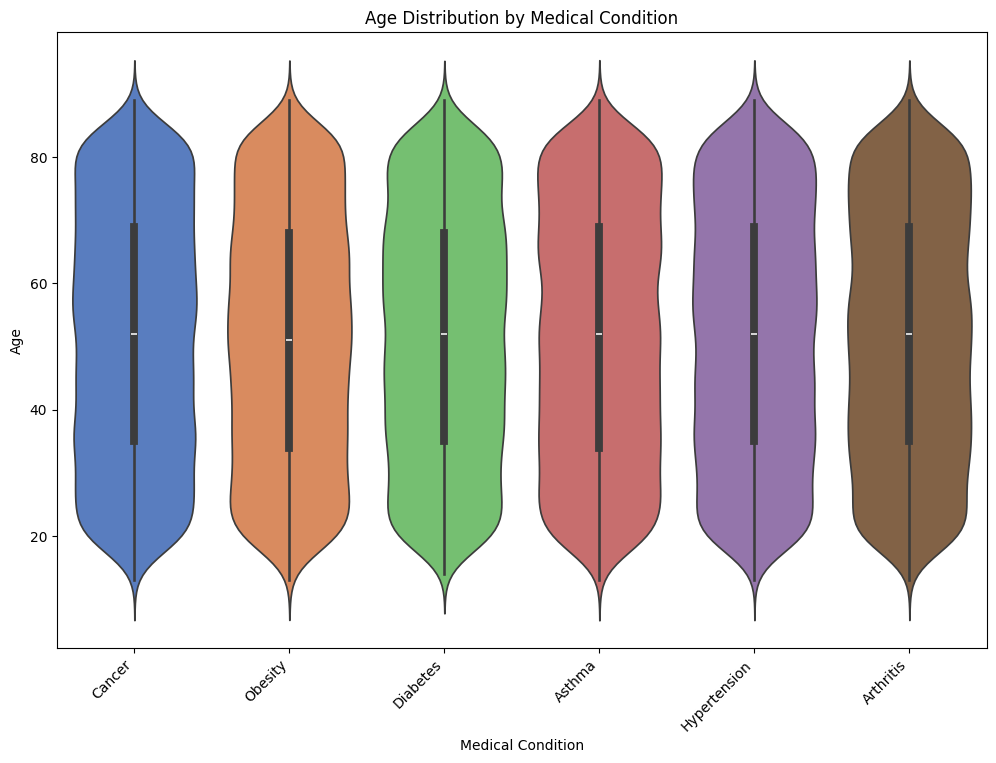

In [20]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = df, x = 'Medical Condition', y = 'Age', palette = 'muted')
plt.title('Age Distribution by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Age')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

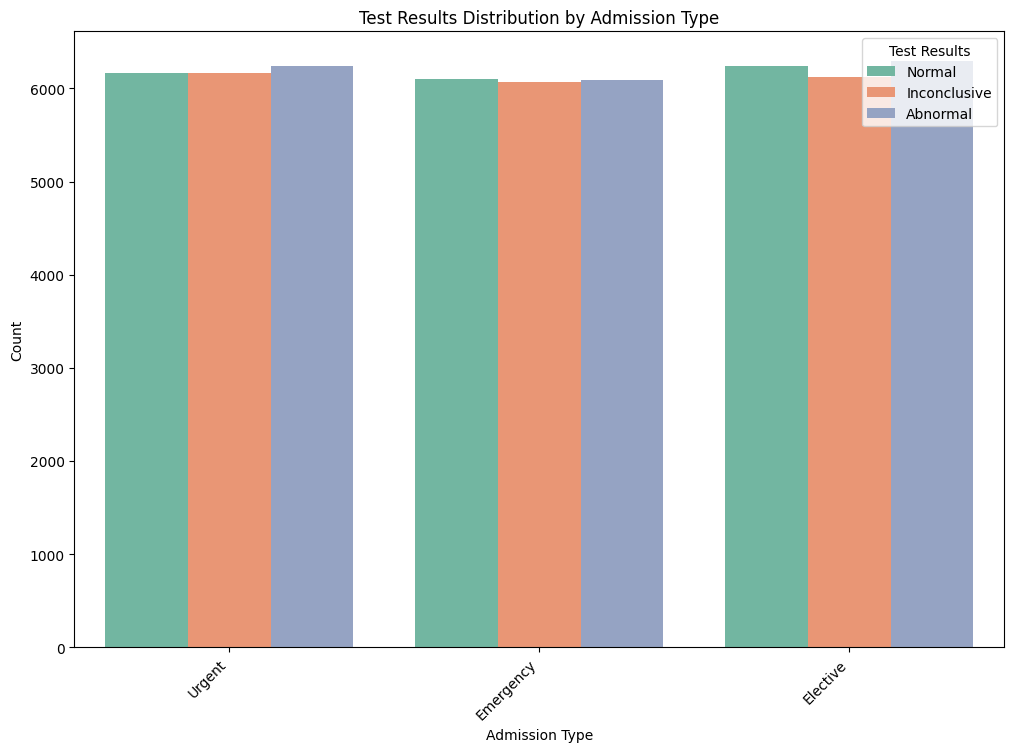

In [21]:
df.columns = df.columns.str.strip()

plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Admission Type', hue='Test Results', palette='Set2')
plt.title('Test Results Distribution by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
average_age = df['Age'].mean()
print(f"The average age of patients is {average_age:.2f} years.")

The average age of patients is 51.54 years.


In [23]:
most_common_condition = df['Medical Condition'].value_counts().idxmax()
print(f"The most common medical condition is {most_common_condition}.")

The most common medical condition is Arthritis.


In [24]:
avg_billing_by_condition = df.groupby('Medical Condition')['Billing Amount'].mean()

print("The average billing amount by medical condition:")
for condition, avg_billing in avg_billing_by_condition.items():
    print(f"{condition}: {avg_billing:.2f}")

The average billing amount by medical condition:
Arthritis: 25497.33
Asthma: 25635.25
Cancer: 25161.79
Diabetes: 25638.41
Hypertension: 25497.10
Obesity: 25805.97


In [25]:
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

avg_stay_by_condition = df.groupby('Medical Condition')['Length of Stay'].mean()

print("The average length of stay amount by medical condition:")
for condition, avg_stay in avg_stay_by_condition.items():
    print(f"{condition}: {avg_stay:.2f}")

The average length of stay amount by medical condition:
Arthritis: 15.52
Asthma: 15.70
Cancer: 15.50
Diabetes: 15.42
Hypertension: 15.46
Obesity: 15.46


In [26]:
doctor_admissions = df['Doctor'].value_counts().idxmax()
print("Doctors with most admissions: ",doctor_admissions)

Doctors with most admissions:  Michael Smith


In [27]:
hospital_distribution = df['Hospital'].value_counts()
print('Distribution of patients across hospitals: ', hospital_distribution)

Distribution of patients across hospitals:  Hospital
LLC Smith                     44
Ltd Smith                     39
Johnson PLC                   38
Smith Ltd                     37
Smith PLC                     36
                              ..
Hammond Ltd                    1
Moran Smith and Galloway,      1
Winters Martin, and Neal       1
James-Owen                     1
Marks, and Vazquez Jenkins     1
Name: count, Length: 39876, dtype: int64


In [28]:
unique_hospitals = df['Hospital'].nunique()
print(f"There are {unique_hospitals} unique hospitals included in the dataset.")

There are 39876 unique hospitals included in the dataset.


In [29]:
oldest_patient_age = df['Age'].max()
oldest_patient_name = df[df['Age'] == oldest_patient_age]['Name'].iloc[0]
print(f"The oldest patient is {oldest_patient_name} with an age of {oldest_patient_age} years.")

The oldest patient is DAVId NeWTOn with an age of 89 years.


In [30]:
youngest_patient_age = df['Age'].min()
youngest_patient_name = df[df['Age'] == youngest_patient_age]['Name'].iloc[0]
print(f"The youngest patient is {youngest_patient_name} with an age of {youngest_patient_age} years.")

The youngest patient is jamES BasS phD with an age of 13 years.


In [31]:
most_frequent_medication = df['Medication'].value_counts().idxmax()
print(f"The most prescribed medication is {most_frequent_medication}.")

The most prescribed medication is Lipitor.


In [32]:
average_billing_amount =df['Billing Amount'].mean()
print(f"The average billing amount is ${average_billing_amount:.2f}.")

The average billing amount is $25539.32.


In [33]:
male_patients = df[df['Gender'] == 'Male'].shape[0]
female_patients = df[df['Gender'] == 'Female'].shape[0]
print(f"There are {male_patients} Male patients, and {female_patients} Female patients.")

There are 27774 Male patients, and 27726 Female patients.


In [34]:
top_three_medical_conditions = df['Medical Condition'].value_counts().head(3)
print("Top three most common medical conditions:")
print(top_three_medical_conditions)

Top three most common medical conditions:
Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

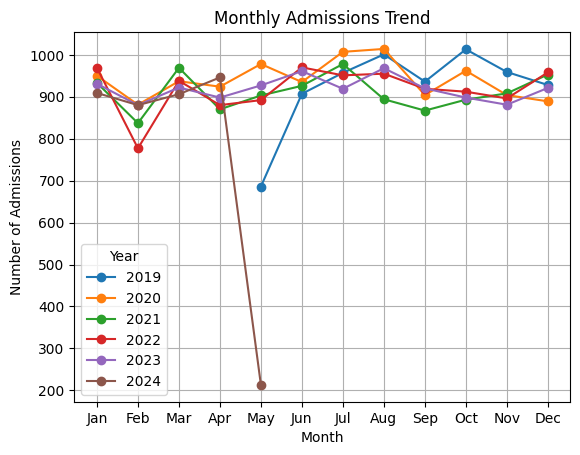

In [35]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce')

df['Admission Year'] = df['Date of Admission'].dt.year
df['Admission Month'] = df['Date of Admission'].dt.month
df['Admission Day'] = df['Date of Admission'].dt.day
df['Admission Weekday'] = df['Date of Admission'].dt.weekday

monthly_admissions = df.groupby(['Admission Year', 'Admission Month']).size().reset_index(name='Counts')

monthly_admissions_pivot = monthly_admissions.pivot(index='Admission Month', columns='Admission Year', values='Counts')

plt.figure(figsize=(12, 6))
monthly_admissions_pivot.plot(kind='line', marker='o')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Monthly Admissions Trend')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.legend(title='Year')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

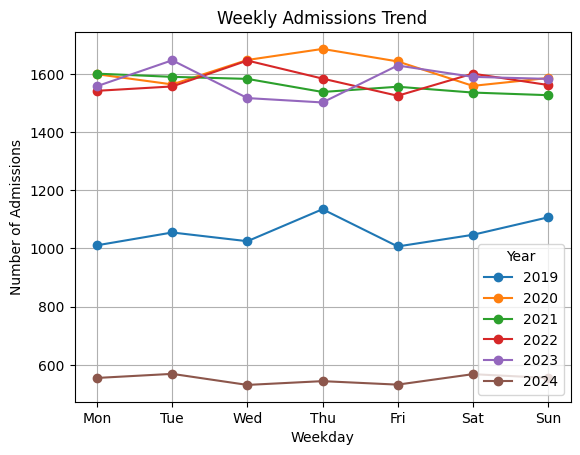

In [36]:
weekly_admissions = df.groupby(['Admission Year', 'Admission Weekday']).size().reset_index(name='Counts')
weekly_admissions_pivot = weekly_admissions.pivot(index='Admission Weekday', columns='Admission Year', values='Counts')

plt.figure(figsize=(12, 6))
weekly_admissions_pivot.plot(kind='line', marker='o')
plt.title('Weekly Admissions Trend')
plt.xlabel('Weekday')
plt.ylabel('Number of Admissions')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Year')
plt.grid(True)
plt.show()